In [1]:
from satisfying_sims.audio.dynamics import agc_rms, soft_limit_tanh, lowpass
from pathlib import Path
import numpy as np
import os
from scipy.io import wavfile
from IPython.display import Audio
import matplotlib.pyplot as plt

In [33]:
import sys, IPython, numpy as np
import scipy
print("python:", sys.version)
print("executable:", sys.executable)
print("ipython:", IPython.__version__)
print("numpy:", np.__version__)
print("scipy:", scipy.__version__)

python: 3.12.12 | packaged by conda-forge | (main, Oct 22 2025, 23:28:53) [Clang 19.1.7 ]
executable: /Users/mitchweikert/miniforge3/envs/satisfying_sims/bin/python
ipython: 9.8.0
numpy: 2.3.5
scipy: 1.16.3


In [34]:
from IPython.display import display, HTML
display(HTML("<b>If this is bold</b> and you see it, HTML rendering works."))

In [2]:
project_root = Path(os.getcwd()).parent
audio_dir = project_root / "assets" / "audio"
sample_name = "crystal_chime"

In [7]:
sr, x = wavfile.read(audio_dir / f"{sample_name}.wav")



In [6]:
np.min(x), np.max(x)

(np.float32(-1.0), np.float32(0.9999695))

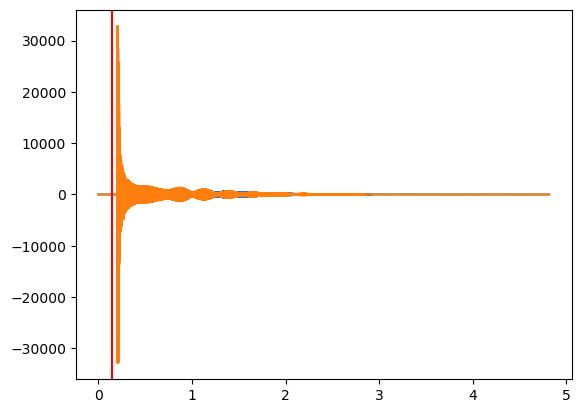

In [14]:
t = np.arange(len(x)) / sr
plt.plot(t, x)
plt.axvline(0.15, color='r')

In [15]:
idx = np.where(np.abs(t - 0.15) == np.min(np.abs(t - 0.15)))[0][0]
print(idx)

6615


In [16]:
wavfile.write(audio_dir / f"{sample_name}_out.wav", sr, x[idx:])

In [25]:
x.min(), x.max()

(np.float32(-1.0), np.float32(0.9999695))